In [12]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt
import numpy as np

train_dir = "car_damage_dataset/train"
valid_dir = "car_damage_dataset/valid"

IMG_SIZE = (224, 224)
BATCH_SIZE = 32

train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    zoom_range=0.2,
    width_shift_range=0.2,
    height_shift_range=-0.2,
    shear_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

valid_datagen = ImageDataGenerator(
    rescale=1./255
)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='binary'
)

valid_generator = valid_datagen.flow_from_directory(
    valid_dir,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='binary'
)

Found 1840 images belonging to 2 classes.
Found 460 images belonging to 2 classes.


In [ ]:
base_model = MobileNetV2(
    input_shape=(224, 224, 3),
    include_top=False,
    weights="imagenet"
)

base_model.trainable = False

x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(128, activation='relu')(x)
x = Dropout(0.3)(x)
output = Dense(1, activation='sigmoid')(x)

model = Model(inputs=base_model.input, outputs=output)

model.compile(
    optimizer=Adam(learning_rate=1e-4),
    loss="binary_crossentropy",
    metrics=["accuracy"]
)

model.summary()


Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_2 (InputLayer)        [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 Conv1 (Conv2D)              (None, 112, 112, 32)         864       ['input_2[0][0]']             
                                                                                                  
 bn_Conv1 (BatchNormalizati  (None, 112, 112, 32)         128       ['Conv1[0][0]']               
 on)                                                                                              
                                                                                                  
 Conv1_relu (ReLU)           (None, 112, 112, 32)         0         ['bn_Conv1[0][0]']      

In [14]:
EPOCHS = 15

history = model.fit(
    train_data,
    epochs=EPOCHS,
    validation_data=valid_data
)


Epoch 1/15


58/58 [==============================] - 98s 2s/step - loss: 0.5458 - accuracy: 0.7109 - val_loss: 0.4058 - val_accuracy: 0.8043
Epoch 2/15
58/58 [==============================] - 60s 1s/step - loss: 0.4035 - accuracy: 0.8272 - val_loss: 0.3569 - val_accuracy: 0.8304
Epoch 3/15
58/58 [==============================] - 59s 1s/step - loss: 0.3362 - accuracy: 0.8647 - val_loss: 0.3808 - val_accuracy: 0.8152
Epoch 4/15
58/58 [==============================] - 56s 961ms/step - loss: 0.3308 - accuracy: 0.8641 - val_loss: 0.3291 - val_accuracy: 0.8435
Epoch 5/15
58/58 [==============================] - 55s 955ms/step - loss: 0.3148 - accuracy: 0.8652 - val_loss: 0.2971 - val_accuracy: 0.8717
Epoch 6/15
58/58 [==============================] - 70s 1s/step - loss: 0.2919 - accuracy: 0.8723 - val_loss: 0.3262 - val_accuracy: 0.8391
Epoch 7/15
58/58 [==============================] - 100s 2s/step - loss: 0.2933 - accuracy: 0.8793 - val_loss: 0.3168 - val_accuracy: 0.8478
Epoch 8/15


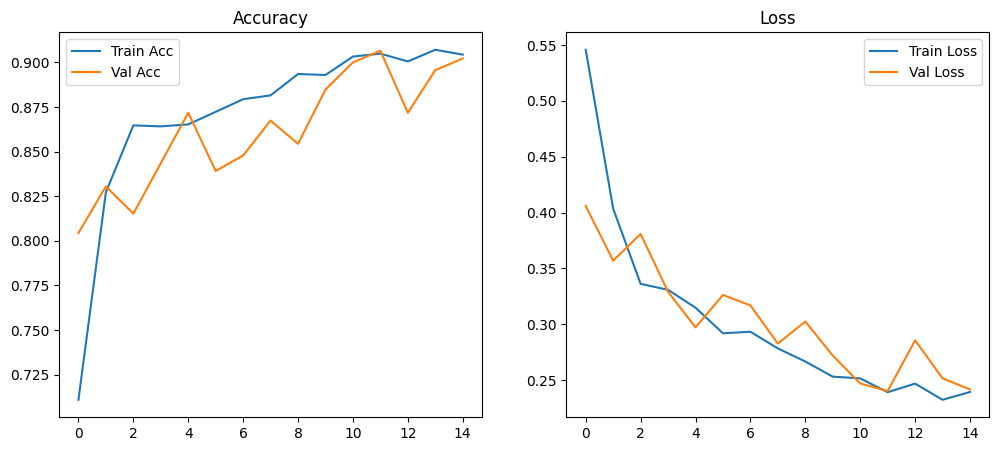

In [15]:
plt.figure(figsize=(12,5))

# Accuracy
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Val Acc')
plt.title("Accuracy")
plt.legend()

# Loss
plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title("Loss")
plt.legend()

plt.show()

In [17]:
val_loss, val_acc = model.evaluate(valid_data)
print("Validation Accuracy:", val_acc)
print("Validation Loss:", val_loss)

15/15 [==============================] - 8s 519ms/step - loss: 0.2416 - accuracy: 0.9022
Validation Accuracy: 0.9021739363670349
Validation Loss: 0.2415802776813507


In [ ]:
import tensorflow as tf
from tensorflow import keras

model = keras.models.load_model("car_damage_model.h5")

model.save("car_damage_model.keras") 


In [53]:
from tensorflow.keras.preprocessing import image

img_path = "car_damage_dataset/valid/damaged/0098.JPEG"  
img = image.load_img(img_path, target_size=(224,224))
img_array = image.img_to_array(img) / 255.0
img_array = np.expand_dims(img_array, axis=0)

pred = model.predict(img_array)[0][0]

if pred > 0.5:
    print("Prediksi: Undamaged")
else:
    print("Prediksi: Damaged")

1/1 [==============================] - 0s 67ms/step
Prediksi: Damaged
